In [33]:
#Plotting shadow. Using this example: https://gis.stackexchange.com/questions/229293/shadow-impact-of-building-on-certain-area
# Note that the comment about South in the above link is wrong, according to pysolar documentation

from pysolar import solar
import datetime
from vapory import Camera, LightSource, Sphere, Texture, Pigment, Scene, Plane, Box, Finish, Normal
from math import sin, cos, radians

def sun_location(altitude, azimuth, from_point, dist_to_sun=100):
    """given an altitude and azimuth to the sun, an assumed
    distance to the sun of 100, and a point of origin 
    find the XYZ location of the sun
    Note: the reference system from pysolar is:
    http://pysolar.readthedocs.io/en/latest/index.html#location-calculation
    The azimuth to the sun is realtive to North. 
    Zero deg is the north, and azimuth is measure clockwise from there
    """

    x_from, y_from, z_from = from_point
    # 
    x_sun = dist_to_sun * sin(radians(azimuth-270))
    y_sun = dist_to_sun * sin(radians(altitude))
    z_sun = dist_to_sun * cos(radians(azimuth-270))

    return x_sun, y_sun, z_sun


def display_shadow(latitude,longitude,day):
    DAY=day[0]
    MONTH=day[1]
    YEAR=day[2]
    HOUR=day[3]
    MIN=day[4]
    # calculate the sun's position in the sky on a given day
    d = datetime.datetime(YEAR,MONTH,DAY,HOUR,MIN,tzinfo=datetime.timezone.utc)
    altitude = solar.get_altitude(latitude,longitude, d)
    azimuth = solar.get_azimuth(latitude,longitude, d)
    sun_loc = sun_location(altitude, azimuth, [0,0,0], dist_to_sun=100)
    print(f"Altitude on {d}: {altitude}")

    # create a light source for the scene with the sun's location
    light = LightSource( sun_loc, 'color', [1,1,1] )

    # set up some scene elements
    camera = Camera( 'location', [0,2,-3], 'look_at', [0,0,2] )

    plane = Plane([0, 1, 0], 0, Texture( Pigment( 'color', [1,1,1] )))

    building = Box([0,0,0], [0.5, 0.5, 0.5],
                             Texture( Pigment( 'color', [0.5,0.5,0.5])),
                            'rotate', [0, 40, 0])

    # set up the scene in POV-Ray with the given elements
    scene = Scene( camera = camera ,
               objects= [light, plane, building],
               included = ["colors.inc"]) # headers that POV-Ray may need

    #scene.render("my_scene.png",
    #    width = 600, height=400,
    #    antialiasing = 0.01,
    #    quality=10) # quality=1 => no shadow/reflection, quality=10 is 'normal'
    return scene



In [41]:
## Example values for station in Denmark
latitude = 54.87610
longitude = 10.349734
DAY=1
MONTH=2
YEAR=2020
HOUR=10
MIN=0
scenes=[]
HOURS=[i for i in range(8,17)]
for HOUR in HOURS:
    day=(DAY,MONTH,YEAR,HOUR,MIN)
    scene=display_shadow(latitude,longitude,day)
    scenes.append(scene)
    
    


Altitude on 2020-02-01 08:00:00+00:00: 5.236699374590609
Altitude on 2020-02-01 09:00:00+00:00: 11.09605577346645
Altitude on 2020-02-01 10:00:00+00:00: 15.372106362141205
Altitude on 2020-02-01 11:00:00+00:00: 17.66860522834899
Altitude on 2020-02-01 12:00:00+00:00: 17.757407456303874
Altitude on 2020-02-01 13:00:00+00:00: 15.629637237706552
Altitude on 2020-02-01 14:00:00+00:00: 11.498683921674127
Altitude on 2020-02-01 15:00:00+00:00: 5.7483273999841025
Altitude on 2020-02-01 16:00:00+00:00: -1.4799410553047312


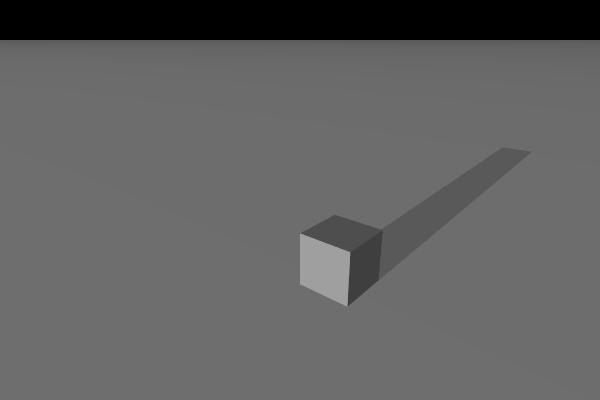

In [31]:
scenes[0].render('ipython', width=600, height=400,quality=10,antialiasing=0.01)


In [40]:
for i,s in enumerate(scenes):
    s.render("scene"+str(HOURS[i]).zfill(2)+".png",width = 600, height=400,antialiasing = 0.01, quality=10) # quality=1 => no shadow/reflection, quality=10 is 'normal'
